# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import seaborn as sns
import matplotlib.pyplot as plt

## Data Importing

In [2]:
# load one file first to see what type of data you're dealing with and what attributes it has
with open('../data/AK_Juneau_1.json', 'r') as f:
    jdata = json.load(f)

In [3]:
# Check the keys
jdata.keys()

dict_keys(['status', 'data'])

In [4]:
# Access the value for the 'data' key
jdata['data'].keys()
data = jdata['data']['results']

In [5]:
# Unpack nested json dictionary
df = pd.json_normalize(data)
df 

,primary_photo,last_update_date,source,tags,permalink,status,list_date,open_houses,branding,list_price,...,location.county.fips_code,location.county.name,source.plan_id,source.agents,source.spec_id,source.type,products.brand_name,location.address.coordinate.lon,location.address.coordinate.lat,other_listings
0,None,None,NaN,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,NaN,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,NaN,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,NaN,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,2023-08-04T22:49:14Z,NaN,"[carport, hill_or_mountain_view, ocean_view, s...",11909-Glacier-Hwy-Apt-105_Juneau_AK_99801_M741...,sold,2023-08-21T21:01:22.000000Z,None,[{'name': 'Platinum Keller Williams Realty Ala...,415000.0,...,None,Juneau,NaN,[{'office_name': 'Platinum Keller Williams Rea...,NaN,mls,basic_opt_in,-134.649067,58.386651,NaN
5,None,2023-08-04T21:31:44Z,NaN,"[city_view, community_outdoor_space, community...",808-5th-St_Juneau_AK_99801_M76604-90777,sold,2023-08-21T21:01:22.000000Z,None,"[{'name': 'Southeast Alaska Real Estate', 'pho...",835000.0,...,None,Juneau,NaN,[{'office_name': 'Southeast Alaska Real Estate...,NaN,mls,essentials,-134.403991,58.304573,NaN
6,None,2023-12-07,NaN,None,4446-Trafalgar-Ave_Juneau_AK_99801_M82741-21172,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,-134.553717,58.396178,NaN


In [6]:
# Get all columns from df
for col in df:
    print(col)

primary_photo
last_update_date
source
tags
permalink
status
list_date
open_houses
branding
list_price
property_id
photos
community
products
virtual_tours
listing_id
price_reduced_amount
matterport
description.year_built
description.baths_3qtr
description.sold_date
description.sold_price
description.baths_full
description.name
description.baths_half
description.lot_sqft
description.sqft
description.baths
description.sub_type
description.baths_1qtr
description.garage
description.stories
description.beds
description.type
lead_attributes.show_contact_an_agent
flags.is_new_construction
flags.is_for_rent
flags.is_subdivision
flags.is_contingent
flags.is_price_reduced
flags.is_pending
flags.is_foreclosure
flags.is_plan
flags.is_coming_soon
flags.is_new_listing
other_listings.rdc
location.address.postal_code
location.address.state
location.address.coordinate
location.address.city
location.address.state_code
location.address.line
location.street_view_url
location.county.fips_code
location.count

In [7]:
# loop over all files and put them into a dataframe

In [8]:
# Directory path to JSON files
dir_path = '../data'

# Create an empty list to store dataframes
dfs = []

# Iterate over all JSON files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.json'):
        file_path = os.path.join(dir_path, filename)
        
        # Open and read each JSON file
        with open(file_path, 'r') as file:
            jdata = json.load(file)  # load JSON data
        data = jdata['data']['results']
        
        # Normalize the JSON data (assuming similar structure in all files)
        dataframe = pd.json_normalize(data, sep = '_')  
        
        # Append the df to the list
        dfs.append(dataframe)

# Concatenate all dfs into a single one
df = pd.concat(dfs, ignore_index = True)

# Final df
df

C:\Users\werwa\AppData\Local\Temp\ipykernel_20852\3043815978.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index = True)


,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,...,location_county_fips_code,location_county_name,primary_photo,source,products,location_address_coordinate,other_listings,community_advertisers,community_description_name,location_county
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.reset_index(drop = True) 
df

,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,...,location_county_fips_code,location_county_name,primary_photo,source,products,location_address_coordinate,other_listings,community_advertisers,community_description_name,location_county
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# df.to_csv("../data/housing_df.csv", index = False)

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [11]:
# Let's first look at our df to check the number of null values and identify the data types of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   last_update_date                       8125 non-null   object 
 1   tags                                   7638 non-null   object 
 2   permalink                              8159 non-null   object 
 3   status                                 8159 non-null   object 
 4   list_date                              7752 non-null   object 
 5   open_houses                            0 non-null      object 
 6   branding                               8159 non-null   object 
 7   list_price                             7721 non-null   float64
 8   property_id                            8159 non-null   object 
 9   photos                                 7403 non-null   object 
 10  community                              0 non-null      object 
 11  virt

We can see that there are 67 columns in total, with some columns being entirely null and others nearly null. Based on the column names, it appears that not all of these columns will be necessary for our model. Specifically, columns related to listing details and agents may not significantly influence house prices, as only the features specific to each house are likely to be relevant. Therefore, we will proceed by dropping columns that are completely or almost completely null, as well as those that are unrelated to the features of the houses.

In [12]:
# Drop fully null columns
null_columns_ls = df.columns[df.isnull().all()].tolist()
df = df.drop(columns = null_columns_ls)

# Drop almost null columns (safeguard against non-existent columns)
almost_null_columns = ['source_plan_id', 
                       'source_spec_id', 
                       'flags_is_foreclosure',
                       'community_advertisers', 
                       'community_description_name'
                      ]
df = df.drop(columns = almost_null_columns, errors = 'ignore')

# Drop columns that will not be needed for the model
unnecessary_columns = ['last_update_date', 
                       'permalink', 
                       'status', 
                       'list_date', 
                       'branding', 
                       'list_price', 
                       'property_id', 
                       'photos',  
                       'virtual_tours', 
                       'listing_id', 
                       'price_reduced_amount', 
                       'matterport', 
                       'primary_photo_href', 
                       'source_agents', 
                       'source_type',
                       'other_listings_rdc',
                       'products_brand_name',
                       'flags_is_new_listing',
                       'lead_attributes_show_contact_an_agent',
                       'location_street_view_url',
                       'location_county_fips_code',
                       'location_address_coordinate_lon',
                       'location_address_coordinate_lat',
                       'flags_is_price_reduced',
                       'description_sub_type',
                       'location_address_postal_code',
                       'location_address_state_code',
                       'location_address_line',
                       'location_county_name',
                       'location_address_state',
                       'description_sold_date',
                      ]
df = df.drop(columns = unnecessary_columns, errors = 'ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tags                    7638 non-null   object 
 1   description_year_built  7316 non-null   float64
 2   description_baths_3qtr  566 non-null    float64
 3   description_sold_price  6716 non-null   float64
 4   description_baths_full  7311 non-null   float64
 5   description_baths_half  2281 non-null   float64
 6   description_lot_sqft    6991 non-null   float64
 7   description_sqft        7323 non-null   float64
 8   description_baths       7980 non-null   float64
 9   description_garage      4448 non-null   float64
 10  description_stories     6260 non-null   float64
 11  description_beds        7504 non-null   float64
 12  description_type        8125 non-null   object 
 13  location_address_city   8154 non-null   object 
dtypes: float64(11), object(3)
memory usage: 

After dropping columns, we are left with 14 columns. However, we have noticed that the tags and description_type columns are of object type and likealy will need to be encoded, which could potentially add more columns to the dataset later.

#### Numerical features

Let's look at summary statistics for numerical columns.

In [13]:
df.describe()

,description_year_built,description_baths_3qtr,description_sold_price,description_baths_full,description_baths_half,description_lot_sqft,description_sqft,description_baths,description_garage,description_stories,description_beds
count,7316.000000,566.000000,6.716000e+03,7311.000000,2281.000000,6.991000e+03,7323.000000,7980.000000,4448.000000,6260.000000,7504.000000
mean,1968.916074,1.247350,4.126050e+05,1.887430,1.105655,2.510949e+05,1933.848559,2.131203,1.926709,1.567732,3.208289
std,35.096914,0.463482,6.994308e+05,0.862214,0.413340,5.823820e+06,1339.039206,1.175940,0.878766,0.730969,1.282732
min,1828.000000,1.000000,3.080000e+02,1.000000,1.000000,0.000000e+00,120.000000,0.000000,1.000000,1.000000,0.000000
25%,1950.000000,1.000000,1.910000e+05,1.000000,1.000000,4.953000e+03,1258.000000,1.000000,1.000000,1.000000,3.000000
50%,1975.000000,1.000000,3.140000e+05,2.000000,1.000000,7.841000e+03,1635.000000,2.000000,2.000000,1.000000,3.000000
75%,1997.000000,1.000000,4.700000e+05,2.000000,1.000000,1.263200e+04,2264.000000,3.000000,2.000000,2.000000,4.000000
max,2024.000000,3.000000,2.706500e+07,8.000000,5.000000,1.676624e+08,32106.000000,9.000000,11.000000,10.000000,12.000000


It doesn't appear that any of these features have unreasonable values. While some features might show outliers that are more than 3 standard deviations from the mean, this could be due to extremely expensive houses with higher values for these features.

In [14]:
# For 'description_sold_price', which is our target variable, we will drop rows with null values. This is to avoid potential inaccuracies in the model that could arise from using incorrect or imputed values.
df.dropna(subset = ['description_sold_price'], inplace = True) # we should have 6716 rows now
df.shape

(6716, 14)

In [15]:
# Fill null values with 0, assuming that for the features listed below, a null value indicates the absence of that feature.
df['description_baths_3qtr'] = df['description_baths_3qtr'].fillna(0)
df['description_baths_full'] = df['description_baths_full'].fillna(0)
df['description_baths_half'] = df['description_baths_half'].fillna(0)
df['description_baths'] = df['description_baths'].fillna(0)
df['description_stories'] = df['description_stories'].fillna(0)
df['description_beds'] = df['description_beds'].fillna(0)
df['description_garage'] = df['description_garage'].fillna(0)

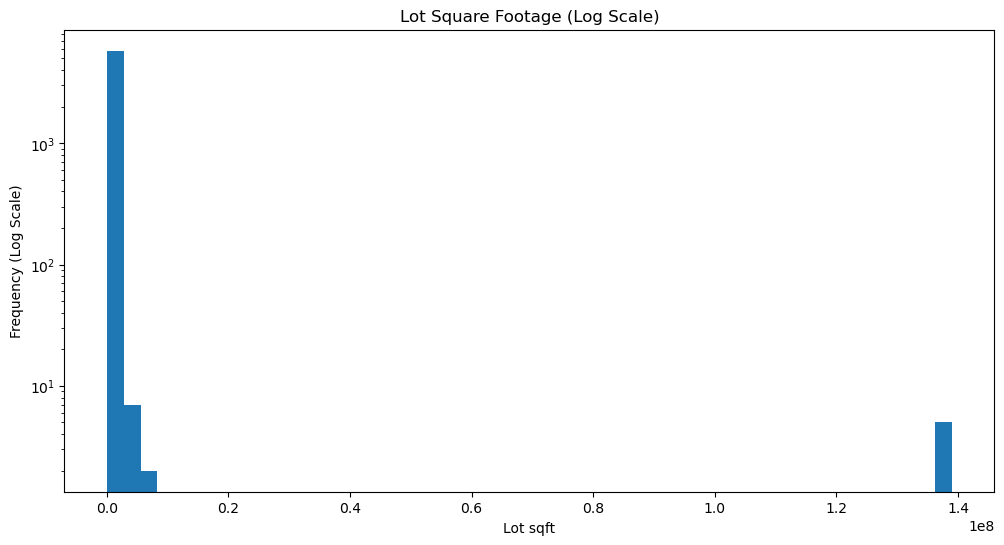

In [16]:
# Before deciding on how to impute sqft and lot_sqft let's look at their distribution

# Plot the distribution for lot_sqft
plt.figure(figsize = (12, 6))
plt.hist(df['description_lot_sqft'].dropna(), bins = 50, log = True) # log scale compresses the wide data range (like we have here, from 0 to 139,043,520.0 sq ft), making it easier to visualize
plt.title('Lot Square Footage (Log Scale)')
plt.xlabel('Lot sqft')
plt.ylabel('Frequency (Log Scale)')
plt.show()

We can observe that the majority of observations fall within the smaller square footage ranges. However, due to the presence of outliers with extremely high values, we will choose to impute null values for this column with the median rather than the mean. The median is less affected by outliers compared to the mean, which ensures that our imputation is more robust and less skewed by the extreme values.

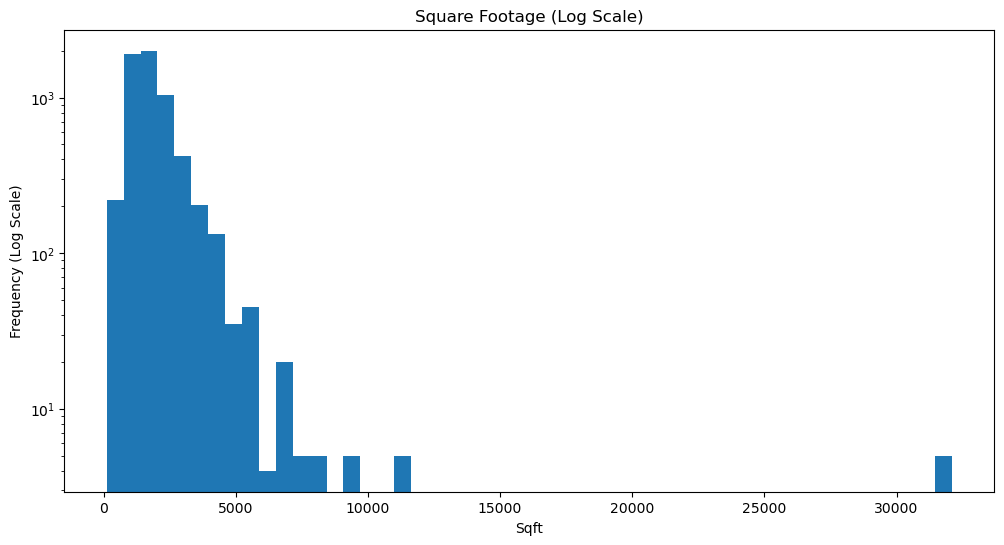

In [17]:
# Plot the distribution for sqft
plt.figure(figsize = (12, 6))
plt.hist(df['description_sqft'].dropna(), bins = 50, log = True) # log scale compresses the wide data range (like we have here, from 0 to 139,043,520.0 sq ft), making it easier to visualize
plt.title('Square Footage (Log Scale)')
plt.xlabel('Sqft')
plt.ylabel('Frequency (Log Scale)')
plt.show()

Similarly, we will impute the median for this column, as we can see that outliers are present.

In [18]:
# Fill null values with mean for sq ft of the lot and house
df['description_lot_sqft'] = df['description_lot_sqft'].fillna(df['description_lot_sqft'].median())
df['description_sqft'] = df['description_sqft'].fillna(df['description_sqft'].median())

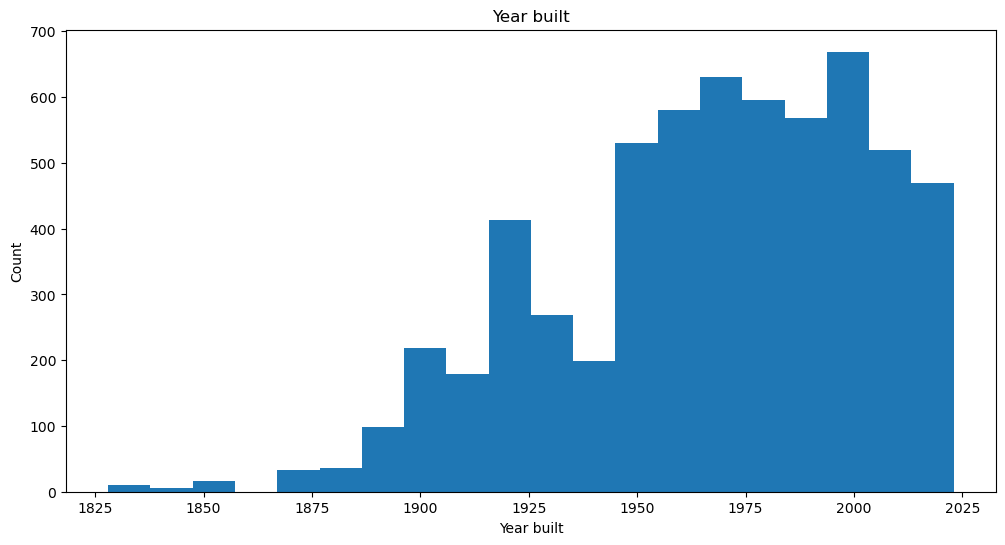

In [19]:
plt.figure(figsize = (12, 6))
plt.hist(df['description_year_built'].dropna(), bins = 20) # log scale compresses the wide data range (like we have here, from 0 to 139,043,520.0 sq ft), making it easier to visualize
plt.title('Year built')
plt.xlabel('Year built')
plt.ylabel('Count')
plt.show()

Since we observe a few houses that were built a long time ago, we've decided to impute the missing values with the median, as it is less influenced by outliers.

In [20]:
# Calculate median for description_year_built
year_built_median = df['description_year_built'].median()
year_built_median_int = int(year_built_median)
# year_built_median_int

In [21]:
# Fill null values for year built with the median
df['description_year_built'] = df['description_year_built'].fillna(year_built_median_int)

In [22]:
# Change year built into decades
df['description_year_built_decade'] = (df['description_year_built'] // 10) * 10
df['description_year_built_decade'] = df['description_year_built_decade'].astype(int)
# Drop description_year_built
df = df.drop(columns = 'description_year_built', errors = 'ignore')

In [23]:
# Dealing with multiple baths columns

# Checking if the values in description_baths are equal to the sum of the other bath columns representing their sizes for each house
df['check'] = df['description_baths'] == (df['description_baths_full'] + df['description_baths_3qtr'] * 0.75 + df['description_baths_half'] * 0.5)
print(df['check'].value_counts())

check
True     4424
False    2292
Name: count, dtype: int64


Let's assume that the result above means that there could be several reasons for this discrepancy: 
- There may be inconsistencies in how bath types were recorded, such as incorrect counts for each batch type.
- Some properties may have missing or incorrect bath information across columns.
- The baths column may have been calculated differently than the sum of the other bath columns.

We will combine the columns into total_baths because it provides a more consistent representation of the different bath types. It will benefit the ML model, as it consolidates bath features into a single variable, making the data easier to work with.

In [24]:
# Create a new column 'description_total_baths' by combining full_baths, 3qtr_baths, and half_baths
df['description_total_baths'] = df['description_baths_full'] + df['description_baths_3qtr'] * 0.75 + df['description_baths_half'] * 0.5

df.drop(['description_baths_full', 'description_baths_3qtr', 'description_baths_half', 'description_baths', 'check'], axis = 1, inplace = True)

#### Categorical features

In [25]:
# Fill null values for description_type with the most frequent value
df['description_type'] = df['description_type'].fillna(df['description_type'].mode()[0])

In [26]:
df['description_type'].unique()

array(['single_family', 'land', 'townhomes', 'multi_family', 'apartment',
       'mobile', 'condos', 'condo', 'other', 'duplex_triplex',
       'condo_townhome_rowhome_coop'], dtype=object)

In [27]:
df = pd.get_dummies(df, columns = ['description_type'], drop_first = True, dtype = 'int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 30 to 8185
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   tags                                          6330 non-null   object 
 1   description_sold_price                        6716 non-null   float64
 2   description_lot_sqft                          6716 non-null   float64
 3   description_sqft                              6716 non-null   float64
 4   description_garage                            6716 non-null   float64
 5   description_stories                           6716 non-null   float64
 6   description_beds                              6716 non-null   float64
 7   location_address_city                         6711 non-null   object 
 8   description_year_built_decade                 6716 non-null   int32  
 9   description_total_baths                       6716 non-null   float

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

We will handle the tags column by first separating it along with a row identifier column into a new df. Then, we’ll use .explode() to split each tag into a separate row. Since there might be too many unique tags to consider, we'll check their frequencies and only keep the most frequent ones. We’ll encode these tags using dummy variables and merge the encoded data back into the original df.

In [28]:
# Create a column that would serve as a unique row identifier
df['id'] = range(1, len(df) + 1)

# Extract tags column into a separate df
tags_df = df[['id', 'tags']].explode('tags')
tags_df.rename(columns = {'tags': 'tag'}, inplace = True)

In [29]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68921 entries, 30 to 8185
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      68921 non-null  int64 
 1   tag     68535 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [30]:
# Check the unique number of tags
tags_df['tag'].nunique()

152

In [31]:
# 152 unique values is way too more! We will check the frequency for each tag and decide how many we will keep
tags_frequency = tags_df['tag'].value_counts()
tags_frequency.head(25)

tag
garage_1_or_more               3778
central_air                    3415
community_outdoor_space        3117
dishwasher                     2975
basement                       2936
fireplace                      2743
forced_air                     2711
single_story                   2653
two_or_more_stories            2621
garage_2_or_more               2497
hardwood_floors                2185
washer_dryer                   1839
laundry_room                   1834
shopping                       1600
recreation_facilities          1515
dining_room                    1359
view                           1309
community_security_features    1309
central_heat                   1088
family_room                    1019
city_view                      1018
fenced_yard                     993
big_lot                         821
floor_plan                      814
new_roof                        747
Name: count, dtype: int64

In [32]:
# Let's keep only the top 20 tags. To do so we will create an object for the top 20 tags and filter our df based on that
top_20_tags = tags_df['tag'].value_counts().nlargest(20).index

In [33]:
# Filter tags to keep only those top 20 in the top_20_tags
filtered_tags = tags_df[tags_df['tag'].isin(top_20_tags)]

In [34]:
# Create a new df tags_added_df with the original 'tags' column dropped, and then merge this df with the filtered_tags
tags_added_df = pd.merge(df.drop(columns = 'tags'), filtered_tags, on = 'id')

In [35]:
# Create a df ohe_tags with one-hot encoded columns for the tag column, excluding the first column to prevent multicollinearity
ohe_tags = pd.get_dummies(tags_added_df['tag'], drop_first = True, dtype = 'int')

# Concatenate the 'id' column from tags_added_df horizontally with ohe_tags
ohe_df = pd.concat([tags_added_df[['id']], ohe_tags], axis = 1)

In [36]:
# Group by id and sum the one-hot encoded columns
ohe_df = ohe_df.groupby('id').sum().reset_index()

# Drop 'tag' column and duplicates in 'id' as we grouped them by id already
no_tags_df = tags_added_df.drop(columns = 'tag').drop_duplicates(subset = 'id')

# Merge df without 'tags' column with one-hot encoded tags df
final_df = pd.merge(no_tags_df, ohe_df, on = 'id')

# Drop id column, as not needed anymore
final_df.drop(columns = 'id', inplace = True)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   description_sold_price                        6133 non-null   float64
 1   description_lot_sqft                          6133 non-null   float64
 2   description_sqft                              6133 non-null   float64
 3   description_garage                            6133 non-null   float64
 4   description_stories                           6133 non-null   float64
 5   description_beds                              6133 non-null   float64
 6   location_address_city                         6128 non-null   object 
 7   description_year_built_decade                 6133 non-null   int32  
 8   description_total_baths                       6133 non-null   float64
 9   description_type_condo                        6133 non-null   i

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [37]:
# Perform train test split here to prevent data leakage 

from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = final_df.drop(columns = ['description_sold_price'])
y = final_df['description_sold_price']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4906, 37)
X_test shape: (1227, 37)
y_train shape: (4906,)
y_test shape: (1227,)


In [38]:
# Combine X_train and y_train to later calculate mean prices by city
train_data = X_train.copy()
train_data['description_sold_price'] = y_train

In [39]:
# Group by 'city' to calculate the mean sale price per city
city_mean_price = train_data.groupby('location_address_city')['description_sold_price'].mean()
city_mean_price = city_mean_price.to_dict()

# Calculate the overall mean price
overall_mean_price = y_train.mean()

# Map the target encoded city values to the training and test sets
X_train['city_encoded'] = X_train['location_address_city'].map(city_mean_price)
X_test['city_encoded'] = X_test['location_address_city'].map(city_mean_price)

# For any missing values (i.e., cities in test set but not in training set), fill with overall mean
X_train['city_encoded'] = X_train['city_encoded'].fillna(overall_mean_price)
X_test['city_encoded'] = X_test['city_encoded'].fillna(overall_mean_price)

# Drop the original city column
X_train = X_train.drop(columns = 'location_address_city')
X_test = X_test.drop(columns = 'location_address_city')

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4906 entries, 3945 to 860
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   description_lot_sqft                          4906 non-null   float64
 1   description_sqft                              4906 non-null   float64
 2   description_garage                            4906 non-null   float64
 3   description_stories                           4906 non-null   float64
 4   description_beds                              4906 non-null   float64
 5   description_year_built_decade                 4906 non-null   int32  
 6   description_total_baths                       4906 non-null   float64
 7   description_type_condo                        4906 non-null   int32  
 8   description_type_condo_townhome_rowhome_coop  4906 non-null   int32  
 9   description_type_condos                       4906 non-null   int3

In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 3727 to 2263
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   description_lot_sqft                          1227 non-null   float64
 1   description_sqft                              1227 non-null   float64
 2   description_garage                            1227 non-null   float64
 3   description_stories                           1227 non-null   float64
 4   description_beds                              1227 non-null   float64
 5   description_year_built_decade                 1227 non-null   int32  
 6   description_total_baths                       1227 non-null   float64
 7   description_type_condo                        1227 non-null   int32  
 8   description_type_condo_townhome_rowhome_coop  1227 non-null   int32  
 9   description_type_condos                       1227 non-null   int

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [42]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [43]:
# perform EDA here

Let's first check the most correlated feature pairs and remove the highly correlated ones. This can help prevent overfitting and improve the model's performance by reducing redundancy and multicollinearity

In [44]:
numeric_df = final_df.select_dtypes(include = ['float', 'int'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Unstack the correlation matrix and sort by absolute value
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove self correlations (correlation of a feature with itself)
corr_pairs = corr_pairs[corr_pairs < 1]

# Get the most correlated pairs
most_correlated_pairs = corr_pairs.head(20)

most_correlated_pairs

description_garage              garage_2_or_more                  0.827969
garage_2_or_more                description_garage                0.827969
single_story                    two_or_more_stories               0.754285
two_or_more_stories             single_story                      0.754285
                                description_stories               0.736181
description_stories             two_or_more_stories               0.736181
garage_1_or_more                description_garage                0.720551
description_garage              garage_1_or_more                  0.720551
garage_1_or_more                garage_2_or_more                  0.654277
garage_2_or_more                garage_1_or_more                  0.654277
description_beds                description_total_baths           0.618570
description_total_baths         description_beds                  0.618570
description_type_single_family  description_type_condos           0.535272
description_type_condos  

In [45]:
# We can see that there is a couple of feature strongly correlated with each other. We will assume correlation >0.65 is strong and therefore drop redundant columns
redundant_cols = ['garage_1_or_more', # will drop 1 or more garages, as this information is redundant since we already have a number of garages
                  'garage_2_or_more', # will drop 2 or more garages, as this information is redundant since we already have a number of garages 
                  'two_or_more_stories'] # will drop 2 or more stories, as this information is redundant since we already have a number of stories 

final_df = final_df.drop(columns = redundant_cols, errors = 'ignore')
X_train = X_train.drop(columns = redundant_cols, errors = 'ignore')
X_test = X_test.drop(columns = redundant_cols, errors = 'ignore')

In [46]:
numeric_df

,description_sold_price,description_lot_sqft,description_sqft,description_garage,description_stories,description_beds,description_year_built_decade,description_total_baths,description_type_condo,description_type_condo_townhome_rowhome_coop,...,garage_1_or_more,garage_2_or_more,hardwood_floors,laundry_room,recreation_facilities,shopping,single_story,two_or_more_stories,view,washer_dryer
0,129900.0,11761.0,1478.0,2.0,1.0,3.0,1990,2.0,0,0,...,1,1,1,1,0,0,1,0,0,0
1,88500.0,6534.0,1389.0,1.0,2.0,4.0,1940,2.0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,145000.0,17424.0,2058.0,0.0,1.0,3.0,1960,2.0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,65000.0,9712.0,1432.0,0.0,1.0,3.0,1950,2.0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,169000.0,10890.0,1804.0,0.0,1.0,3.0,1980,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128,74250.0,11326.0,3356.0,2.0,0.0,5.0,1970,2.0,0,0,...,1,1,0,0,0,0,0,0,0,0
6129,99000.0,4792.0,1214.0,1.0,2.0,3.0,1910,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
6130,29700.0,7841.0,988.0,0.0,0.0,3.0,1970,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6131,162250.0,65340.0,1470.0,0.0,0.0,3.0,1970,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Heatmap
Let's also look closer at the correlation between basic features and the target. 

<Axes: >

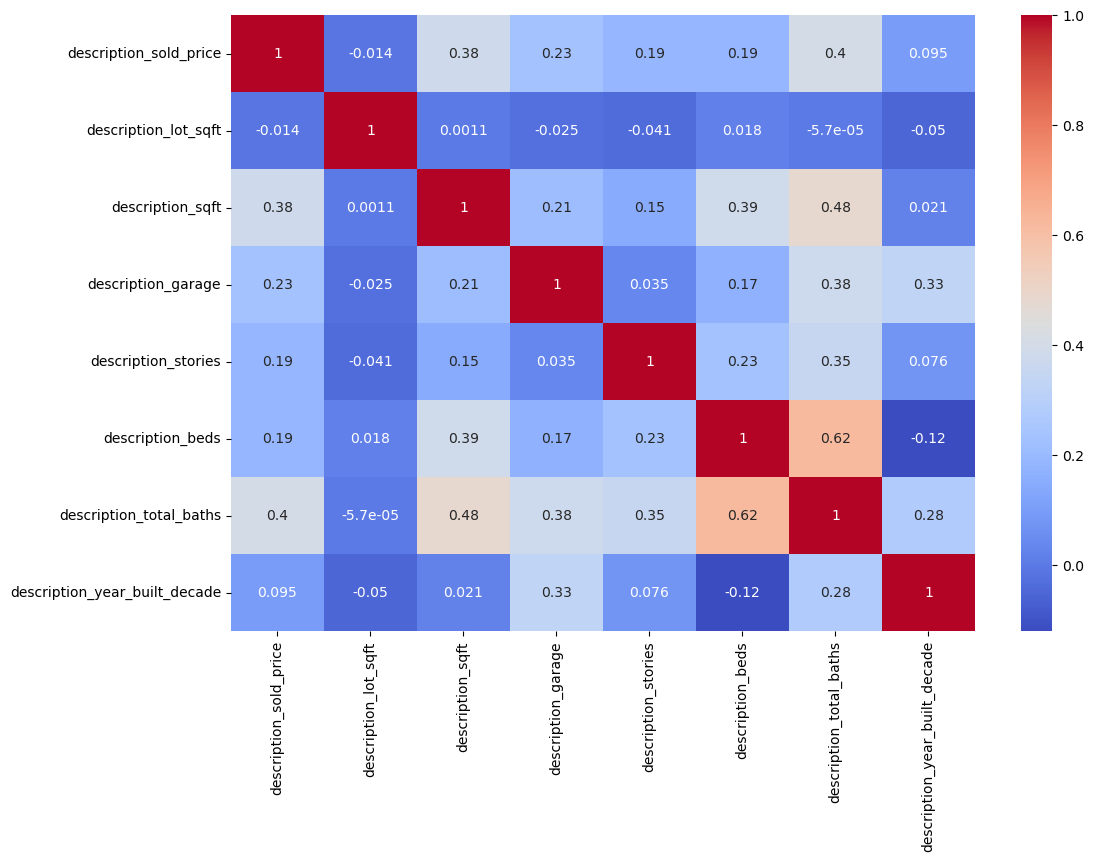

In [47]:
# Heatmap
cols = ['description_sold_price',
        'description_lot_sqft',
        'description_sqft',
        'description_garage',
        'description_stories',
        'description_beds',
        'description_total_baths',
        'description_year_built_decade'
       ]

numeric_df = final_df[cols]

correlation_matrix = numeric_df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

We can see a neat visual summary of correlation between some of the features. We can observe a moderate correlation, which means their contribution in the price prediction

In [ ]:
# Distributions, We will only check columns which are not coming from ohe

num_cols = final_df.select_dtypes(include = ['int', 'float']).columns.tolist()

#To see the distribution I will plot histograms for distance to the station, rating, free bikes and empty slots
final_df.hist(column = num_cols, bins = 30, figsize = (18, 16))

Summary from the distribution plot

In [ ]:
# Scatterplot

# sns.pairplot(final_df[num_cols])

Summary from the scatterplot

#### Outliers

In [ ]:
from scipy import stats

# Function to detect outliers using Z-score for specific columns
def detect_outliers_zscore(df, columns, threshold = 3):
    outliers = pd.DataFrame(False, index = df.index, columns = columns)  # Initialize a df of False values
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]).dropna())  # Calculate Z-scores
        outliers[col] = z_scores > threshold  # Mark outliers where Z-score exceeds the threshold
    return outliers

# Specify the columns in X_train where you want to detect outliers
col_outliers = ['description_lot_sqft', 'description_sqft', 'description_garage', 
                'description_stories', 'description_beds', 'description_total_baths', 
                'description_year_built_decade']

# Detect outliers for X_train
X_train_outliers = detect_outliers_zscore(X_train, col_outliers)

# Detect outliers for y_train (since it's a Series, we handle it slightly differently)
y_train_outliers = pd.Series(np.abs(stats.zscore(y_train)) > 3, index = y_train.index)

# Combine outliers for X_train and y_train into a single mask
outliers_combined = X_train_outliers.any(axis = 1) | y_train_outliers

# Filter out rows that have outliers in either X_train or y_train
X_train = X_train[~outliers_combined]
y_train = y_train[~outliers_combined]

# Print the results
print(f"Cleaned X_train shape: {X_train.shape}")
print(f"Cleaned y_train shape: {y_train.shape}")

In [ ]:
## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# After scaling, both the training and test sets are in NumPy array format. So, we need to convert them back to pd dataframes before exporting them to csv. 
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
#Exporting test/training data into CSV

X_train.to_csv('../data/preprocessed/X_train.csv', index = False)
X_test.to_csv('../data/preprocessed/X_test.csv', index = False)
y_train.to_csv('../data/preprocessed/y_train.csv', index = False)
y_test.to_csv('../data/preprocessed/y_test.csv', index = False)

In [ ]:
final_df.to_csv('../data/preprocessed/housing_df_preprocessed.csv', index = False)

In [ ]:
X_train.info()

In [ ]:
X_test.info()